# Libraries

In [48]:
!pip install matplotlib

In [49]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# pre-processing

In [50]:
#importing the dataset
df=pd.read_csv('../input/crime-against-women-20012014-india/crimes_against_women_2001-2014.csv')
df.head()


,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Unnamed: 0                                           10677 non-null  int64 
 1   STATE/UT                                             10677 non-null  object
 2   DISTRICT                                             10677 non-null  object
 3   Year                                                 10677 non-null  int64 
 4   Rape                                                 10677 non-null  int64 
 5   Kidnapping and Abduction                             10677 non-null  int64 
 6   Dowry Deaths                                         10677 non-null  int64 
 7   Assault on women with intent to outrage her modesty  10677 non-null  int64 
 8   Insult to modesty of Women                           10677 non-null  int64 


In [52]:
#removing the unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
10672,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


In [53]:
#to see the unique states and union territories
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       '

In [54]:
#since the states are repeated converting all states to upper and comibing the same states
df.loc[df['STATE/UT'] == 'A&N Islands', 'STATE/UT'] = 'A & N ISLANDS'
df.loc[df['STATE/UT'] == 'D&N Haveli', 'STATE/UT'] = 'D & N HAVELI'
df.loc[df['STATE/UT'] == 'Delhi UT', 'STATE/UT'] = 'DELHI'

#converting all the state names to capitals
df['STATE/UT'] = pd.Series(str.upper(i) for i in df['STATE/UT'])
df['DISTRICT'] = pd.Series(str.upper(i) for i in df['DISTRICT'])

**creating a data frame for statewise analysis**

In [55]:
#stroring the sum of all crimes comitted within a state statewise
state_all_crimes = df.groupby('STATE/UT').sum()

#droping the sum of year column
state_all_crimes.drop('Year',axis=1,inplace=True)

#adding a column containig the total crime against women in that state
col_list= list(state_all_crimes)
state_all_crimes['Total']=state_all_crimes[col_list].sum(axis=1)
all_crimes = state_all_crimes

all_crimes

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
STATE/UT,,,,,,,,
A & N ISLANDS,336,212,20,600,112,288,0,1568
ANDHRA PRADESH,32150,34504,13844,126952,86964,280906,34,575354
ARUNACHAL PRADESH,1316,1470,6,1996,48,476,0,5312
ASSAM,40190,62074,3268,38256,254,115300,22,259364
BIHAR,30758,57086,32206,16958,694,69770,904,208376
CHANDIGARH,770,1682,90,1088,342,2080,0,6052
CHHATTISGARH,29308,11808,2758,47096,3968,23436,12,118386
D & N HAVELI,132,224,2,106,12,90,0,566
DAMAN & DIU,60,44,6,40,4,76,0,230


# Analysis

**visualsing each crime statewise**

In [56]:
#sorting the statewise crime from highest to lowest
state_all_crimes.sort_values('Total',ascending=False)
state_all_crimes

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
STATE/UT,,,,,,,,
A & N ISLANDS,336,212,20,600,112,288,0,1568
ANDHRA PRADESH,32150,34504,13844,126952,86964,280906,34,575354
ARUNACHAL PRADESH,1316,1470,6,1996,48,476,0,5312
ASSAM,40190,62074,3268,38256,254,115300,22,259364
BIHAR,30758,57086,32206,16958,694,69770,904,208376
CHANDIGARH,770,1682,90,1088,342,2080,0,6052
CHHATTISGARH,29308,11808,2758,47096,3968,23436,12,118386
D & N HAVELI,132,224,2,106,12,90,0,566
DAMAN & DIU,60,44,6,40,4,76,0,230


In [57]:
state_all_crimes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, A & N ISLANDS to WEST BENGAL
Data columns (total 8 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   Rape                                                 36 non-null     int64
 1   Kidnapping and Abduction                             36 non-null     int64
 2   Dowry Deaths                                         36 non-null     int64
 3   Assault on women with intent to outrage her modesty  36 non-null     int64
 4   Insult to modesty of Women                           36 non-null     int64
 5   Cruelty by Husband or his Relatives                  36 non-null     int64
 6   Importation of Girls                                 36 non-null     int64
 7   Total                                                36 non-null     int64
dtypes: int64(8)
memory usage: 2.5+ KB


In [58]:
state_all_crimes=state_all_crimes.reset_index()

In [59]:
#sates v/s total crimes
sorted_df = state_all_crimes.sort_values('Total',ascending=False)
fig = px.bar( x=sorted_df['STATE/UT'],y=sorted_df["Total"], color=sorted_df["Total"], 
             labels={'x': "States", 'y': "Count"}, title="Total Cases", 
             color_continuous_scale='burg')
fig.show()

It can be seen from above that, the state with the highest crimes against women is Uttar Pradesh followed by Andhra Pradesh and West Bengal.And all the top ten states with hishest crimes can be seen.
Lakshadweep is the state with the least crime rates.

**analysing the each crime statewise**

In [60]:
#states v/s rapes

fig = px.bar( x=state_all_crimes['STATE/UT'],y=state_all_crimes["Rape"], color=state_all_crimes["Rape"], 
             labels={'x': "States", 'y': "Count"}, title="Rape Cases", 
             color_continuous_scale='burg')
fig.show()



The highest number of Rape cases have been reported from Madhya Pradesh

In [61]:
#states v/s  kidnapping and abduction

fig = px.bar( x=state_all_crimes['STATE/UT'],y=state_all_crimes["Kidnapping and Abduction"], color=state_all_crimes["Kidnapping and Abduction"], 
             labels={'x': "States", 'y': "Count"}, title="Kidnapping and Abduction Cases", 
             color_continuous_scale='burg')
fig.show()

Uttar Pradesh has reported the highest cases of abduction in India.It can also be seent that majority of the cases reported from uttar pradesh are of kidnapping and ubduction.

In [62]:
#states v/s  Dowry Deaths

fig = px.bar( x=state_all_crimes['STATE/UT'],y=state_all_crimes["Dowry Deaths"], color=state_all_crimes["Dowry Deaths"], 
             labels={'x': "States", 'y': "Count"}, title="Dowry Deaths", 
             color_continuous_scale='burg')
fig.show()

Again Uttar Pradesh has top the list in reported cases of dowry deaths

In [63]:
#states v/s  Assault on women with intent to outrage her modesty

fig = px.bar( x=state_all_crimes['STATE/UT'],y=state_all_crimes["Assault on women with intent to outrage her modesty"], color=state_all_crimes["Assault on women with intent to outrage her modesty"], 
             labels={'x': "States", 'y': "Count"}, title="Assault on women with intent to outrage her modesty", 
             color_continuous_scale='burg')
fig.show()

It can be seen that assult on women outraging her modesty forms the contributes the highest to crimes in Madhya Pradesh,it being the  state reporting the highest of such crimes.

In [64]:
#states v/s Insult to modesty of Women

fig = px.bar( x=state_all_crimes['STATE/UT'],y=state_all_crimes["Insult to modesty of Women"], color=state_all_crimes["Insult to modesty of Women"], 
             labels={'x': "States", 'y': "Count"}, title="Insult to modesty of Women", 
             color_continuous_scale='burg')
fig.show()

Andra pradesh has reported the highest number of cases of insult to modesty of women.

In [65]:
#states v/s Cruelty by Husband or his Relatives

fig = px.bar( x=state_all_crimes['STATE/UT'],y=state_all_crimes["Cruelty by Husband or his Relatives"], color=state_all_crimes["Cruelty by Husband or his Relatives"], 
             labels={'x': "States", 'y': "Count"}, title="Cruelty by Husband or his Relatives", 
             color_continuous_scale='burg')
fig.show()

West Bengal has reported the highest cases of crime pertaining to the cruelty by husband and relatives.However,dowry deaths are not that high in the state.

In [66]:
#states v/s Importation of Girls

importation_df = state_all_crimes.copy()
importation_df.loc[importation_df['Importation of Girls'] <= 50, 'STATE/UT'] = 'Others' # Represent only large countries
fig = px.pie(importation_df, values='Importation of Girls', names='STATE/UT', title="Importation of Girls", 
            color_discrete_sequence=px.colors.sequential.Teal_r)
fig.update_traces(textposition='inside', textinfo='label+value',
                marker=dict(line=dict(color='#000000', width=2)))
#fig.update_layout(annotations=[dict(text='count', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

Importation cases have been the least reported cases and Bihar has been the state with the highest number of such reported cases.

# clustering

Aim: K-means clustering to classify the states into saf or unsafe i.e red zone

In [67]:
all_crimes = all_crimes.reset_index()
all_crimes


,STATE/UT,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
0,A & N ISLANDS,336,212,20,600,112,288,0,1568
1,ANDHRA PRADESH,32150,34504,13844,126952,86964,280906,34,575354
2,ARUNACHAL PRADESH,1316,1470,6,1996,48,476,0,5312
3,ASSAM,40190,62074,3268,38256,254,115300,22,259364
4,BIHAR,30758,57086,32206,16958,694,69770,904,208376
5,CHANDIGARH,770,1682,90,1088,342,2080,0,6052
6,CHHATTISGARH,29308,11808,2758,47096,3968,23436,12,118386
7,D & N HAVELI,132,224,2,106,12,90,0,566
8,DAMAN & DIU,60,44,6,40,4,76,0,230
9,DELHI,20312,46586,3758,30742,7928,42834,2,152162


In [68]:
all_crimes.shape

(36, 9)

In [69]:
#finding the mean number of crimes
m=all_crimes['Total'].mean()
print('mean=',m)

#finding the quantiles 
q = np.quantile(all_crimes['Total'],[0.25,0.75])
print(q)
l=q[0]
u=q[1]

mean= 147822.5
[  5060.5 211358.5]


In [70]:
#copying the state_all_crimes to a new dataframe to normalise values and predict
df_kmeans = all_crimes.loc[:,all_crimes.columns!="STATE/UT"]

#adding an additional column called output
output=[]
for i in df_kmeans['Total']:
    if i >= m:
        output.append(1)#redzone
    elif m > i:
        output.append(0)#safe

all_crimes['output']=output
df_kmeans_y=all_crimes['output']

In [71]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
cols = df_kmeans.columns
cols

Index(['Rape', 'Kidnapping and Abduction', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls', 'Total'],
      dtype='object')

In [72]:
ms=MinMaxScaler()

df_kmeans = ms.fit_transform(df_kmeans)

In [73]:

df_kmeans = pd.DataFrame(df_kmeans,columns=[cols])
df_kmeans.head()

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
0,0.003473,0.001545,0.000349,0.002998,0.001242,0.000796,0.000000,0.002600
1,0.353170,0.253870,0.241791,0.649419,1.000000,0.816285,0.037611,0.987904
2,0.014246,0.010802,0.000105,0.010140,0.000506,0.001343,0.000000,0.009029
3,0.441545,0.456734,0.057077,0.195647,0.002875,0.335027,0.024336,0.445287
4,0.337869,0.420032,0.562491,0.086686,0.007935,0.202714,1.000000,0.357730


**K-MEANS MODELLING WITH 2 CLUSTERS**

In [74]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(df_kmeans)

KMeans(n_clusters=2, random_state=0)

In [75]:
kmeans.inertia_

6.49248832628424

In [76]:
#checking the accuracy

labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(df_kmeans_y == labels)

print('labels:',labels)
print('df_kmeans output:',df_kmeans_y)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, df_kmeans_y.size))

labels: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1]
df_kmeans output: 0     0
1     1
2     0
3     1
4     1
5     0
6     0
7     0
8     0
9     1
10    0
11    1
12    1
13    0
14    0
15    0
16    1
17    1
18    0
19    1
20    1
21    0
22    0
23    0
24    0
25    1
26    0
27    0
28    1
29    0
30    1
31    0
32    0
33    1
34    0
35    1
Name: output, dtype: int64
Result: 27 out of 36 samples were correctly labeled.


In [77]:
#based on the prediction of the k means algorithm classifying the states 
#as safe or unsafe for women
final=[]
for i in range(len(labels)):
    state=all_crimes['STATE/UT'][i]
    label = labels[i]
    if label == 1:
        final.append([state,'unsafe'])
        
    else:
        final.append([state,'safe'])
        

final_df = pd.DataFrame(final, columns=['STATES/UT', 'SAFE/UNSAFE'])
  
final_df

,STATES/UT,SAFE/UNSAFE
0,A & N ISLANDS,safe
1,ANDHRA PRADESH,unsafe
2,ARUNACHAL PRADESH,safe
3,ASSAM,safe
4,BIHAR,safe
5,CHANDIGARH,safe
6,CHHATTISGARH,safe
7,D & N HAVELI,safe
8,DAMAN & DIU,safe
9,DELHI,safe


**CONCLUSION:**
Based on the above classification the laws in the those states can be made more stringent

# forecasting the crime for future years


**Using the arima model to forecast**

forecasting the dowry deaths in Uttar Pradesh based on the information of past 14 years in the state



In [78]:
#creating the desired dataset

df_UP = df[df['STATE/UT']== 'UTTAR PRADESH']
df_UP.drop(df.columns.difference(['Year','Dowry Deaths']), 1, inplace=True)
X = df_UP.groupby(['Year'], sort=True).sum()
df_UP = pd.DataFrame(X)
df_UP=df_UP.reset_index()
df_UP

,Year,Dowry Deaths
0,2001,4422
1,2002,3786
2,2003,2644
3,2004,3416
4,2005,3128
5,2006,3596
6,2007,4152
7,2008,4474
8,2009,4464
9,2010,4434


**Visualising**

Seeing the trend of the crime over the years 

<AxesSubplot:xlabel='Year'>

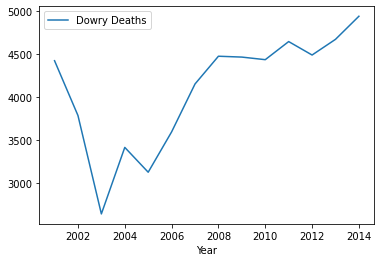

In [79]:
#plotting the graph of year v/s number of dowry deaths
#df_UP.plot(x='Year',y='Dowry Deaths')
df_UP.plot(kind = 'line',
        x = 'Year',
        y = 'Dowry Deaths')

Based on the above trend we can see that the cases have grown progressively during the years.
This has to be seriously taken into consideration as the cases have been the highest in the year 2014.

In [80]:
#using the ARIMA model to forecast the future 5 years values
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [81]:
def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")
check_stationarity(df_UP['Dowry Deaths'])

ADF Statistic: -1.095771
p-value: 0.716755
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702
Non-stationary


From the above it can be proved that by dicky fuller test the series in non stationary

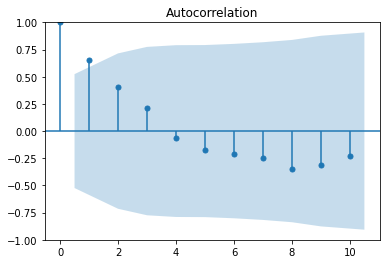

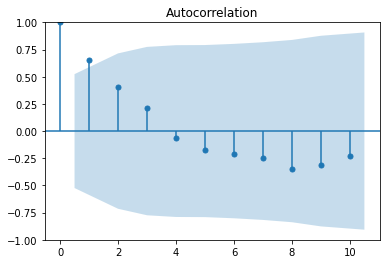

In [82]:
#acf plot
plot_acf(df_UP['Dowry Deaths'],lags=10)

From the above q=1

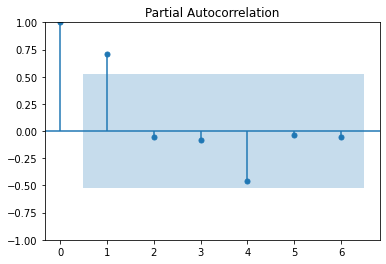

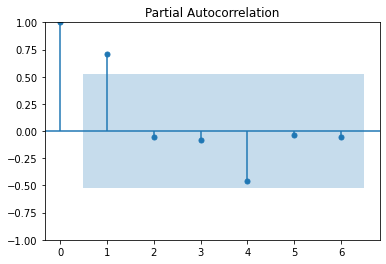

In [83]:
#pacf plot
plot_pacf(df_UP['Dowry Deaths'],lags=6)

From the above it can be taken that p=1

In [84]:
#building the ARIMA model with p=1,d=1,q=1
model = ARIMA(df_UP['Dowry Deaths'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Dowry Deaths   No. Observations:                   14
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -98.697
Date:                Tue, 15 Nov 2022   AIC                            203.395
Time:                        04:39:33   BIC                            205.090
Sample:                             0   HQIC                           203.047
                                 - 14                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7985      0.256     -3.118      0.002      -1.300      -0.297
ma.L1          0.9998      0.509      1.966      0.049       0.003       1.997
sigma2      2.304e+05   2.21e-06   1.04e+11      0.0

In [85]:
fc = model_fit.forecast(7, alpha=0.05)
for i in fc:
    print(round(i,0))


4991.0
4949.0
4982.0
4955.0
4977.0
4960.0
4973.0


**These are the next 7 years forecast based on the ARIMA model**

Similarly, other crimes can also be forecasted. 
Uttar Pradesh was chosen because  it is the state with the highest number of crimes and dowry deaths was a major component of those crimes and also its a crime which has been faught agaisnt from pre-independence era.

# CONCLUSION:

It is surprising to see the heavy crime rates against women in India ,a country where women are worshipped as goddesses.
The trends of crimes has increased over the years in some parts of the country.
The crime against women are not eveny distributed ,the crimes in some states are very high as compared to other states, the reasons for this could be  : not educating the importance of social respect of women, population ,culture ,social reforms ,strict laws and actions etc 
The above statistics can be used to enforce and pass stricter laws in the repective areas of the crime to ensure a better place and society for women.